<a href="https://colab.research.google.com/github/yaredsha/machine-learning-playground/blob/main/chapter_4_2_multiclass_text_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.datasets import reuters

In [2]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
    num_words=10000)

2121728/2110848 [==============================] - 0s 0us/step


In [3]:
len(train_data)

8982

In [4]:
len(test_data)

2246

**Decoding newswires back to text**

In [8]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = " ".join([reverse_word_index.get(i - 3, "?") for i in
    train_data[0]])

565248/550378 [==============================] - 0s 0us/step


In [10]:
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [13]:
train_labels

array([ 3,  4,  3, ..., 25,  3, 25])

In [12]:
test_labels

array([ 3, 10,  1, ...,  3,  3, 24])

# **Preparing the data**
Encoding the integer sequences via multi-hot encoding

In [15]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results

**Vectorize data**

In [16]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

**Encoding the labels**

In [21]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

**Model definition**

In [18]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])

**Compile model**

In [19]:
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

# **Validating your approach**
**Setting aside a validation set**

In [22]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

**Training the model**

In [23]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 2s 64ms/step - loss: 2.5364 - accuracy: 0.5279 - val_loss: 1.7341 - val_accuracy: 0.6510
Epoch 2/20
16/16 [==============================] - 1s 49ms/step - loss: 1.4206 - accuracy: 0.6971 - val_loss: 1.3163 - val_accuracy: 0.7190
Epoch 3/20
16/16 [==============================] - 1s 50ms/step - loss: 1.0462 - accuracy: 0.7789 - val_loss: 1.1298 - val_accuracy: 0.7680
Epoch 4/20
16/16 [==============================] - 1s 52ms/step - loss: 0.8162 - accuracy: 0.8290 - val_loss: 1.0388 - val_accuracy: 0.7740
Epoch 5/20
16/16 [==============================] - 1s 51ms/step - loss: 0.6487 - accuracy: 0.8582 - val_loss: 0.9659 - val_accuracy: 0.8010
Epoch 6/20
16/16 [==============================] - 1s 50ms/step - loss: 0.5195 - accuracy: 0.8941 - val_loss: 0.9206 - val_accuracy: 0.8090
Epoch 7/20
16/16 [==============================] - 1s 50ms/step - loss: 0.4146 - accuracy: 0.9171 - val_loss: 0.9156 - val_accuracy: 0.8030
Epoch 8/20
16

**Plotting the training and validation loss**

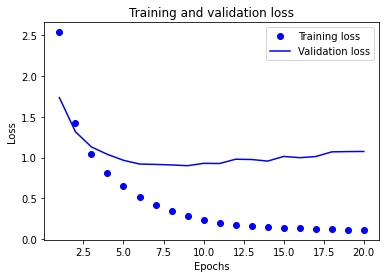

In [25]:
import matplotlib.pyplot as plt

loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

**Plotting the training and validation accuracy**

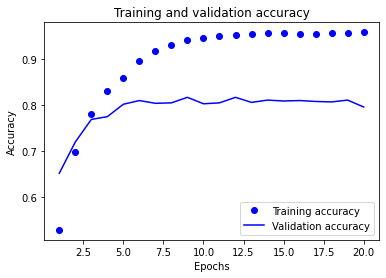

In [26]:
plt.clf()
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

The model begins to overfit after nine epochs. Let's train a new model from scratch for nine epochs and then evaluate it on the test set.

**Retraining a model from scratch**

In [27]:
model = keras.Sequential([
  layers.Dense(64, activation="relu"),
  layers.Dense(64, activation="relu"),
  layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(x_train,
          y_train,
          epochs=9,
          batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/9
18/18 [==============================] - 1s 45ms/step - loss: 2.6379 - accuracy: 0.5294
Epoch 2/9
18/18 [==============================] - 1s 45ms/step - loss: 1.3726 - accuracy: 0.7219
Epoch 3/9
18/18 [==============================] - 1s 44ms/step - loss: 1.0136 - accuracy: 0.7889
Epoch 4/9
18/18 [==============================] - 1s 44ms/step - loss: 0.7909 - accuracy: 0.8377
Epoch 5/9
18/18 [==============================] - 1s 43ms/step - loss: 0.6261 - accuracy: 0.8713
Epoch 6/9
18/18 [==============================] - 1s 45ms/step - loss: 0.4993 - accuracy: 0.8970
Epoch 7/9
18/18 [==============================] - 1s 44ms/step - loss: 0.4034 - accuracy: 0.9146
Epoch 8/9
18/18 [==============================] - 1s 44ms/step - loss: 0.3289 - accuracy: 0.9294
Epoch 9/9
71/71 [==============================] - 0s 3ms/step - loss: 0.9404 - accuracy: 0.7996


In [28]:
results

[0.9403989315032959, 0.7996438145637512]

# **Generating predictions on new data**

In [29]:
predictions = model.predict(x_test)

Each entry in "predictions" is a vector of length 46

In [30]:
predictions[0].shape

(46,)

The coefficients in this vector sum to 1, as they form a probability distribution

In [31]:
np.sum(predictions[0])

1.0

The largest entry in the predicted class - the class with the highest probablity:

In [34]:
predictions[0]

array([1.13854278e-03, 2.03653661e-04, 1.02598322e-04, 6.36938155e-01,
       3.14752042e-01, 1.47746578e-05, 6.41528459e-05, 1.37571158e-04,
       1.50250818e-03, 1.00561274e-05, 1.53514746e-04, 2.89583602e-03,
       3.91611567e-04, 2.24026432e-03, 1.72246655e-05, 1.70689582e-05,
       1.95828713e-02, 2.32023839e-03, 2.00136783e-04, 1.05490535e-03,
       1.99134881e-03, 8.53474811e-03, 4.41481779e-06, 1.81971860e-04,
       5.59662149e-05, 3.79764620e-04, 1.25546912e-05, 4.09474378e-05,
       1.69056275e-05, 8.09675548e-04, 8.05725940e-05, 4.74897097e-04,
       3.34077340e-05, 1.92117823e-05, 4.77092137e-04, 1.74782792e-04,
       3.03128531e-04, 3.10706586e-04, 1.01278865e-05, 2.01542838e-03,
       1.95606162e-06, 4.10290922e-05, 2.54918617e-04, 2.86464183e-05,
       3.99110149e-07, 7.66143239e-06], dtype=float32)

Get index of the max value

In [32]:
np.argmax(predictions[0])

3

Max value

In [35]:
predictions[0][3]

0.63693815